In [39]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
neural = pd.read_csv('Neural_test_df_FD001-1.txt', index_col=0)
forest = pd.read_csv('Forest_test_df_FD001-1.txt', index_col=0)
df = neural
df = df.rename(columns = {'pred_RUL':'Neural_RUL', 'abs_er':'Neural_abs_err', 'rel_er':'Neural_rel_err'})
df[['Forest_RUL', 'Forest_abs_err', 'Forest_rel_err']] = forest[['pred_RUL', 'abs_er', 'rel_er']]
df = df[['engine_no', 'time_in_cycles', 'sensor_11', 'sensor_4', 'sensor_12', 'sensor_7', 'real_RUL', 'Neural_RUL', 'Forest_RUL', 'Neural_abs_err', 'Neural_rel_err', 'Forest_RUL', 'Forest_abs_err', 'Forest_rel_err']]


df.to_csv('dataframe.csv')

df2 = df.iloc[::20, :]
df2.to_csv('dataframe.txt')
df3 = df.loc[df['engine_no']==49]
df3.head()

#sns.relplot(data = df, y = ['real_RUL', 'Neural_RUL', 'Forest_RUL'] , x = 'sensor_11', kind = 'scatter', ci=None)
#plt.savefig('RUL_sensor.png', bbox_inches='tight', dpi = 300)

,engine_no,time_in_cycles,sensor_11,sensor_4,sensor_12,sensor_7,real_RUL,Neural_RUL,Forest_RUL,Neural_abs_err,Neural_rel_err,Forest_RUL,Forest_abs_err,Forest_rel_err
5962,49,1,47.37,1405.05,522.21,554.28,323,138.80612,157.890782,184.19388,57.025970,157.890782,165.109218,51.117405
5963,49,2,47.09,1391.77,522.86,554.22,322,178.02567,190.871827,143.97433,44.712524,190.871827,131.128173,40.723035
5964,49,3,47.27,1404.73,522.30,554.44,321,146.54895,171.887412,174.45105,54.346120,171.887412,149.112588,46.452520
5965,49,4,47.05,1398.72,522.69,553.92,320,153.25824,172.191798,166.74176,52.106796,172.191798,147.808202,46.190063
5966,49,5,47.10,1404.26,523.13,554.83,319,147.10822,176.867737,171.89178,53.884570,176.867737,142.132263,44.555568


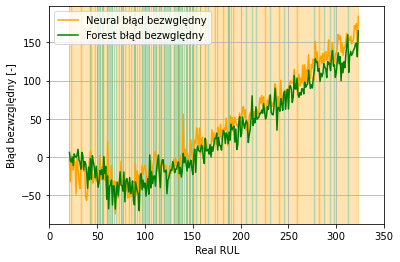

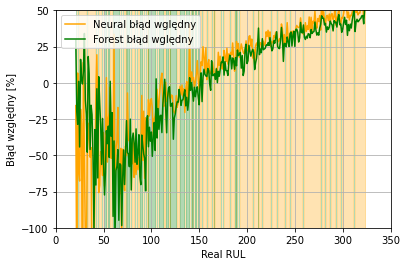

In [40]:
# set seaborn style
color_map = ['#FF8B00', '#C5C4C4']
#sns.set_theme(style='dark', palette = color_map)

 
# Data
x=df3['real_RUL']
y1, y2 = df3['Neural_abs_err'], df3['Forest_abs_err']
Y1 = [y1,y2]
y3, y4 =df3['Neural_rel_err'], df3['Forest_rel_err']
Y2 = [y3,y4]

# Plot
fig, ax = plt.subplots()


plt.xlabel('Real RUL', fontsize=10)
plt.ylabel('Błąd bezwzględny [-]', fontsize=10)
plt.plot(x,y1,label='Neural błąd bezwględny', color = 'orange')
plt.plot(x,y2,label='Forest błąd bezwględny', color='green')
plt.legend(loc='upper left')
ax.fill_between(x, -50, 150, where=abs(y1) > abs(y2), color='orange', alpha=0.3, transform=ax.get_xaxis_transform())
ax.fill_between(x, -50, 150, where=abs(y2) > abs(y1), color='green', alpha=0.3, transform=ax.get_xaxis_transform())
plt.grid()
plt.xlim([0,350])
plt.savefig('ABS.png', bbox_inches='tight', dpi = 300)
plt.show()

fig, ax = plt.subplots()

plt.xlabel('Real RUL', fontsize=10)
plt.ylabel('Błąd względny [%]', fontsize=10)
plt.plot(x,y3,label='Neural błąd wględny', color ='orange')
plt.plot(x,y4,label='Forest błąd wględny', color ='green')
ax.fill_between(x, -50, 150, where=abs(y3) > abs(y4), color='orange', alpha=0.3, transform=ax.get_xaxis_transform())
ax.fill_between(x, -50, 150, where=abs(y4) > abs(y3), color='green', alpha=0.3, transform=ax.get_xaxis_transform())
plt.legend(loc='upper left')
plt.grid()
plt.xlim([0,350])
plt.ylim([-100,50])
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
plt.savefig('REL.png', bbox_inches='tight', dpi = 300)
plt.show()

#plt.plot()
#ax.fill_between(x, y1, y2, color = 'blue')
#ax.fill_between(x, y2, y1, color = 'green')
#, where=y1 > y2, color='orange', alpha=0.5, transform=ax.get_xaxis_transform())
#ax.fill_between(x, y2, y1, where=y2 > y1, color='green', alpha=0.5, transform=ax.get_xaxis_transform())




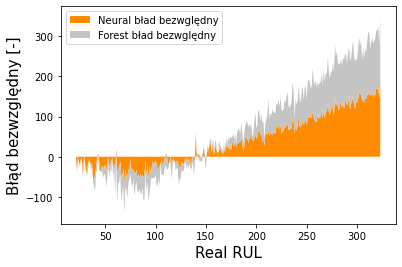

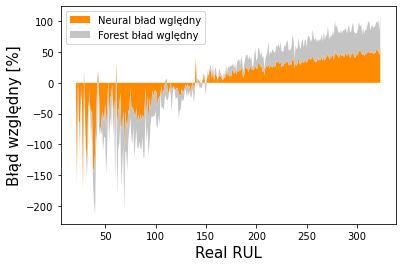

In [3]:
# set seaborn style
color_map = ['#FF8B00', '#C5C4C4']
#sns.set_theme(style='dark', palette = color_map)

 
# Data
x=df3['real_RUL']
y1=[df3['Neural_abs_err'], df3['Forest_abs_err']]
y2=[df3['Neural_rel_err'], df3['Forest_rel_err']]

# Plot

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6, 6))

ax1.fill_between(x, y1)
ax1.set_title('fill between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_title('fill between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_title('fill between y1 and y2')
ax3.set_xlabel('x')
fig.tight_layout()


fig, ax = plt.subplots()
x = np.arange(0, 4 * np.pi, 0.01)
y = np.sin(x)
ax.plot(x, y, color='black')


ax.fill_between(x, where=y1[0] > y1[1],
                color='orange', alpha=0.5, transform=ax.get_xaxis_transform())





plt.xlabel('Real RUL', fontsize=15)
plt.ylabel('Błąd bezwzględny [-]', fontsize=15)
plt.stackplot(x,y1,labels=['Neural bład bezwględny', 'Forest bład bezwględny'], colors = color_map)
plt.legend(loc='upper left')
plt.savefig('ABS.png', bbox_inches='tight', dpi = 300)
plt.show()

plt.xlabel('Real RUL', fontsize=15)
plt.ylabel('Błąd względny [%]', fontsize=15)
plt.stackplot(x,y2,labels=['Neural bład wględny', 'Forest bład wględny'], colors = color_map)
plt.legend(loc='upper left')
plt.savefig('REL.png', bbox_inches='tight', dpi = 300)
plt.show()

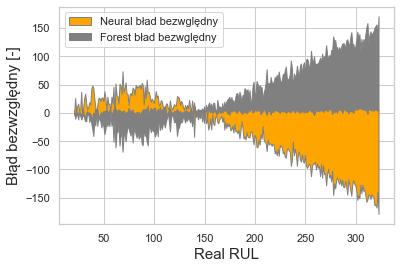

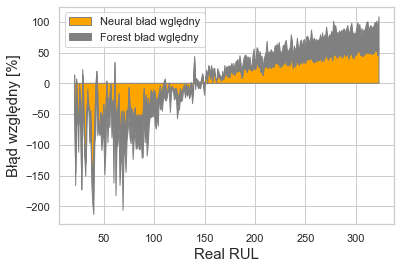

In [21]:
# set seaborn style
color_map = ['Orange', 'Gray']
sns.set_theme(style='whitegrid', palette = color_map)

 
# Data
x=df3['real_RUL']
y1=[df3['Neural_abs_err'], df3['Forest_abs_err']]
y2=[df3['Neural_rel_err'], df3['Forest_rel_err']]

# Plot
plt.xlabel('Real RUL', fontsize=15)
plt.ylabel('Błąd bezwzględny [-]', fontsize=15)
plt.stackplot(x,y1,labels=['Neural bład bezwględny', 'Forest bład bezwględny'], edgecolor = ['Gray', 'Orange'], baseline = 'wiggle')
plt.legend(loc='upper left')
plt.savefig('ABS.png', bbox_inches='tight', dpi = 300)
plt.show()

plt.xlabel('Real RUL', fontsize=15)
plt.ylabel('Błąd względny [%]', fontsize=15)
plt.stackplot(x,y2,labels=['Neural bład wględny', 'Forest bład wględny'], edgecolor = ['Gray', 'Orange'])
plt.legend(loc='upper left')
plt.savefig('REL.png', bbox_inches='tight', dpi = 300)
plt.show()